In [14]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.datasets import mnist
import numpy as np

In [15]:
# loading and reducing the shape
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

In [ ]:
# Debugging for labels
print("Labels:", np.unique(y_train, return_counts=True))

Labels: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [ ]:
#The classes are fairly balanced, though class 5 has a slightly smaller number.

In [17]:
pipeline = Pipeline([
    ('pca', PCA(n_components=50)),
    ('logreg', LogisticRegression(max_iter=1000))
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=50)),
                ('logreg', LogisticRegression(max_iter=1000))])

In [18]:
y_pred = pipeline.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 960    0    3    2    0    5    7    1    1    1]
 [   0 1108    2    3    0    3    3    2   14    0]
 [   6   10  907   14   11    3   14   14   41   12]
 [   2    0   20  909    1   32    2   11   20   13]
 [   2    2    7    3  906    3   10    3   11   35]
 [   8    3    8   47   11  753   18    5   32    7]
 [  15    3    4    1   14   13  900    4    4    0]
 [   3    8   29    7    7    2    1  938    3   30]
 [  10    7    7   33   10   33   16    7  839   12]
 [  10    8    4    9   37    8    0   24   12  897]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.88      0.90      1032
           3       0.88      0.90      0.89      1010
           4       0.91      0.92      0.92       982
           5       0.88      0.84      0.86       892
           6       0.93      0.94      0.93      

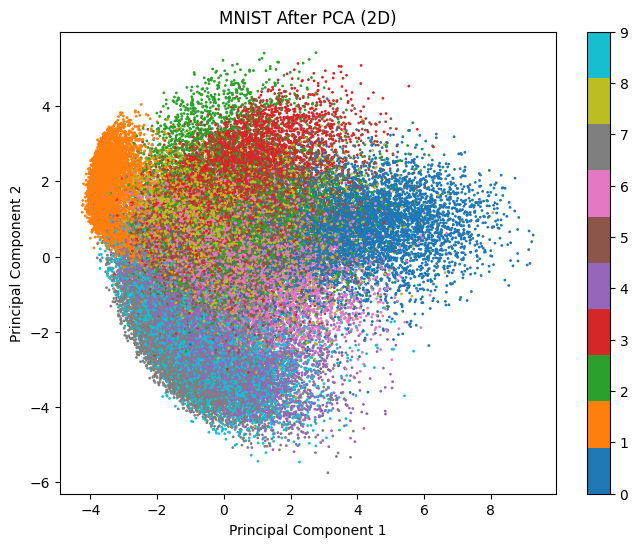

In [19]:
import matplotlib.pyplot as plt
pca_2d = PCA(n_components=2)
x_train_2d = pca_2d.fit_transform(x_train)

plt.figure(figsize=(8,6))
plt.scatter(x_train_2d[:,0], x_train_2d[:,1], c=y_train, cmap='tab10', s=1)
plt.colorbar()
plt.title("MNIST After PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
